In [2]:
from torchvision.datasets import FashionMNIST
trainset = FashionMNIST(root='Data',
                        train=True,
                        download=True)

img, label = trainset[0]
print(type(img), label)

<class 'PIL.Image.Image'> 9


In [3]:
type(img)

PIL.Image.Image

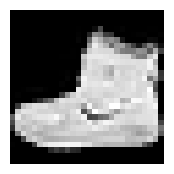

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2, 2))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

# Conert to Tensor

In [5]:
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor()])
trainset = FashionMNIST(root='Data',
                        train=True,
                        download=True,
                        transform= transform)

img, label = trainset[0]
print(type(img), label)
print(img)

<class 'torch.Tensor'> 9
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000

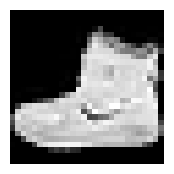

In [6]:
import matplotlib.pyplot as plt
import numpy as np

img, _ =trainset[0]
np_img = img.numpy()
np_img = np.transpose(np_img, (1, 2, 0))

plt.figure(figsize=(2, 2))
plt.imshow(np_img, cmap='gray')
plt.axis('off')
plt.show()

In [7]:
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor()])
trainset = FashionMNIST(root='Data',
                        train=True,
                        download=True,
                        transform= transform)

trainloader = DataLoader(trainset,
                         batch_size=1024,
                         num_workers=6,
                         shuffle=True)

print(len(trainloader))
print(type(trainloader))

59
<class 'torch.utils.data.dataloader.DataLoader'>


In [8]:
for d in trainloader:
    images, labels = d
    print(images.shape)
    print(labels.shape)
    break

torch.Size([1024, 1, 28, 28])
torch.Size([1024])


In [9]:
#batch_size=1024
for i, (inputs, labels) in enumerate(trainloader, 0):
    print(f'Batch index {i} -- {inputs.shape} -- {labels.shape}')

Batch index 0 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 1 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 2 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 3 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 4 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 5 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 6 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 7 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 8 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 9 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 10 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 11 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 12 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 13 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 14 -- torch.Size([

In [10]:
X = inputs
print(X.shape)

torch.Size([608, 1, 28, 28])


In [11]:
import torch

flatten_layer = torch.nn.Flatten()
X_flatten = flatten_layer(X)
print(X_flatten.shape)

torch.Size([608, 784])


In [12]:
linear_layer = torch.nn.Linear(784, 20)

logits = linear_layer(X_flatten)
print(logits.shape)

torch.Size([608, 20])
